In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
Datos = pd.read_csv('C:/Users/JUAN PABLO/OneDrive/Documentos/7-SEMESTRE/heart_cleveland_upload.csv')

In [61]:
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2.000000,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0.996633,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0.996633,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2.000000,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2.000000,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2.000000,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2.000000,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0.996633,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0.996633,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2.000000,145,0,4.2,2,0,2,0


In [11]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - Presión arterial en reposo')

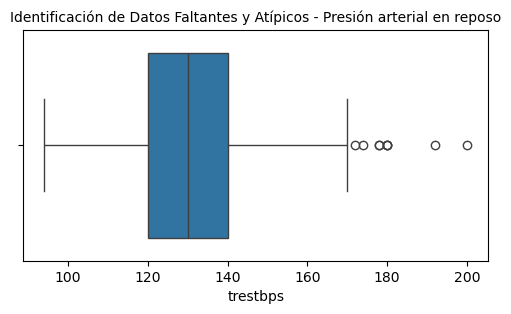

In [27]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos - Presión arterial en reposo', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - colesterol')

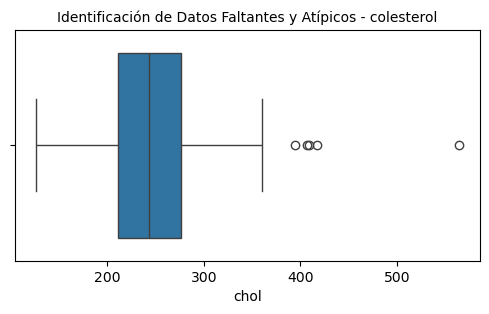

In [29]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos - colesterol', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos - presión del ST en ejercicio')

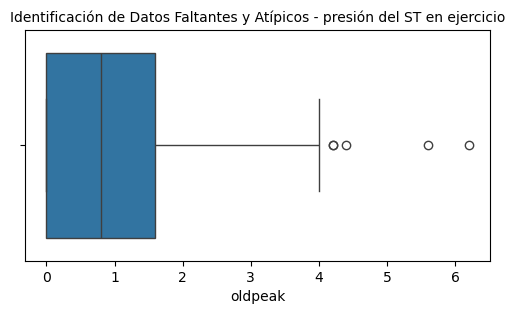

In [31]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos - presión del ST en ejercicio', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Edad')

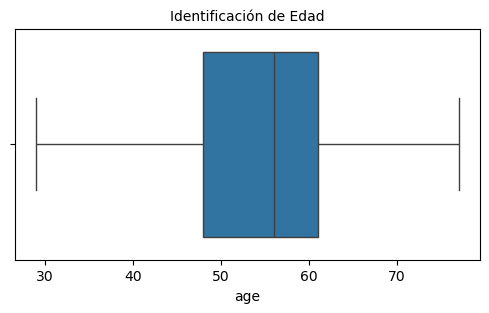

In [17]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Edad', fontsize=10 )

In [33]:
print("Cantidad de Registros con cero en Nivel de colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en glucemia en ayunas: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en electrocardiográfico en reposo: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en frecuencia cardiaca máxima: ",Datos['thalach'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de colesterol:  0
Cantidad de Registros con cero en glucemia en ayunas:  254
Cantidad de Registros con cero en electrocardiográfico en reposo:  147
Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en frecuencia cardiaca máxima:  0


In [35]:
# Reemplazar solo el valor de restecg, se cambio este valor de 0 examenes tomados a minimo 1 examen para los paciente del estudio:
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())

In [37]:
print("Cantidad de Registros con cero en Nivel de colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en glucemia en ayunas: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en electrocardiográfico en reposo: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en frecuencia cardiaca máxima: ",Datos['thalach'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de colesterol:  0
Cantidad de Registros con cero en glucemia en ayunas:  254
Cantidad de Registros con cero en electrocardiográfico en reposo:  0
Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en frecuencia cardiaca máxima:  0


In [47]:
#Conteo de Datos Atípicos - colesterol

nivel_minimo=40
nivel_maximo=500
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [49]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [55]:
#Conteo de Datos Atípicos - colesterol

nivel_minimo=40
nivel_maximo=500
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [ ]:
# Característica de interes:
# Paciente con enfermedad cardiaca: si la persona tiene enfermedades cardiovasculares o no (0 = no tiene diabetes - 1 = si tiene diabetes)
# Predecir si una persona tiene la presencia de enfermedades cardíacas

In [87]:
# Total de personas con enfermedades cardíacas

Datos['condition'].value_counts()

condition
0    159
1    137
Name: count, dtype: int64

In [101]:
# Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)

In [105]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs   restecg  thalach  exang  oldpeak  \
239   55    1   3       140   217    0  0.996633      111      1      5.6   
64    41    0   1       130   204    0  2.000000      172      0      1.4   
134   47    1   2       130   253    0  0.996633      179      0      0.0   
31    58    1   1       120   284    0  2.000000      160      0      1.8   
225   57    1   3       165   289    1  2.000000      124      0      1.0   
..   ...  ...  ..       ...   ...  ...       ...      ...    ...      ...   
73    71    0   2       110   265    1  2.000000      130      0      0.0   
10    59    1   0       170   288    0  2.000000      159      0      0.2   
154   37    0   2       120   215    0  0.996633      170      0      0.0   
153   37    1   2       130   250    0  0.996633      187      0      3.5   
200   60    1   3       125   258    0  2.000000      141      1      2.8   

     slope  ca  thal  
239      2   0     2  
64       0   0     0  
134   

In [107]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs   restecg  thalach  exang  oldpeak  \
162   67    1   3       125   254    1  0.996633      163      0      0.2   
288   42    1   3       136   315    0  0.996633      125      1      1.8   
117   52    1   2       172   199    1  0.996633      162      0      0.5   
74    70    1   2       160   269    0  0.996633      112      1      2.9   
96    59    1   2       126   218    1  0.996633      134      0      2.2   
136   46    1   2       150   231    0  0.996633      147      0      3.6   
129   49    1   2       118   149    0  2.000000      126      0      0.8   
77    68    0   2       120   211    0  2.000000      115      0      1.5   
272   46    0   3       138   243    0  2.000000      152      1      0.0   
51    49    1   1       130   266    0  0.996633      171      0      0.6   
55    46    0   1       105   204    0  0.996633      172      0      0.0   
251   53    0   3       130   264    0  2.000000      143      0      0.4   

In [109]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [111]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
162,67,1,3,125,254,1,0.996633,163,0,0.2,1,2,2
288,42,1,3,136,315,0,0.996633,125,1,1.8,1,0,1
117,52,1,2,172,199,1,0.996633,162,0,0.5,0,0,2
74,70,1,2,160,269,0,0.996633,112,1,2.9,1,1,2
96,59,1,2,126,218,1,0.996633,134,0,2.2,1,1,1
136,46,1,2,150,231,0,0.996633,147,0,3.6,1,0,0
129,49,1,2,118,149,0,2.000000,126,0,0.8,0,3,0
77,68,0,2,120,211,0,2.000000,115,0,1.5,1,0,0
272,46,0,3,138,243,0,2.000000,152,1,0.0,1,0,0
51,49,1,1,130,266,0,0.996633,171,0,0.6,0,0,0


In [113]:
print (Prediccion)

[1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1]


In [115]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



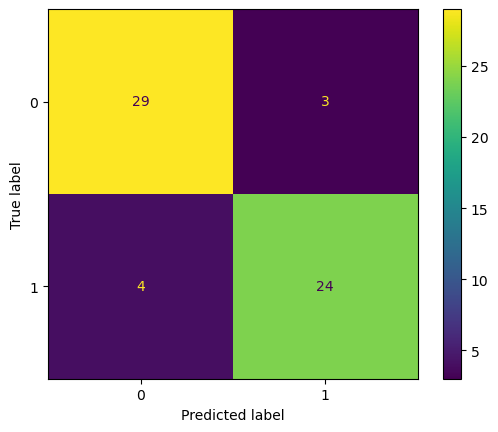

In [117]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

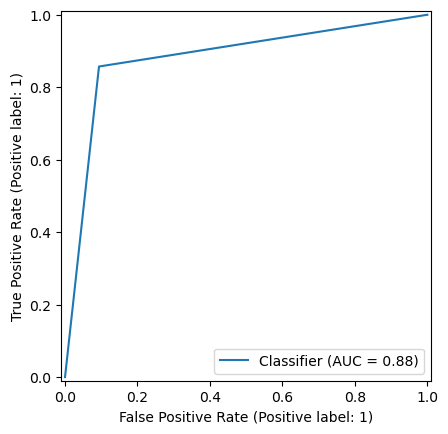

In [119]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()